In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook
import scipy.optimize as scp

matplotlib.use('nbagg')

In [75]:
wb = load_workbook('волоконный лазер.xlsx')
work = wb['Лист1']

In [52]:

P_in = np.array([work['B7':'B15'][i][0].value*
              work['D7':'D15'][i][0].value*
              0.02333 for i in range(9)]) # Вт
P_out = np.array([work['C7':'C15'][i][0].value*270/10000 for i in range(9)])


<IPython.core.display.Javascript object>


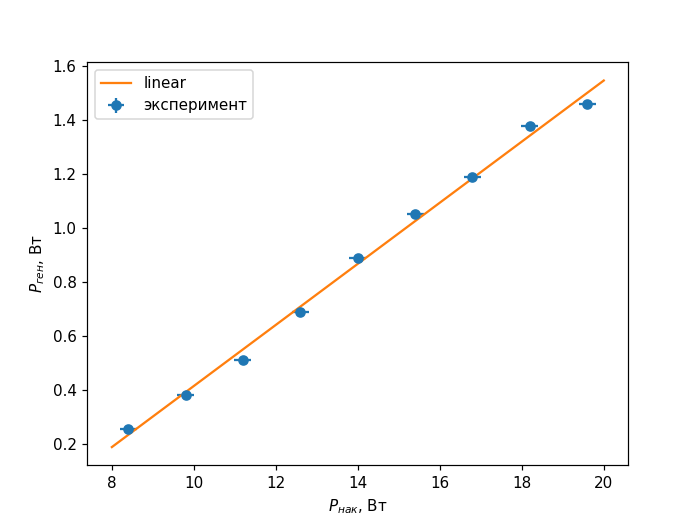

kpd is :  0.11312687526789543
porog: 6.328734867860185


In [88]:
%matplotlib notebook
plt.xlabel('$P_{нак}$, Вт')
plt.ylabel('$P_{ген}$, Вт')

k, b = np.polyfit(P_in, P_out, 1)

plt.errorbar(P_in, P_out, xerr = 0.023*9, yerr = P_out/270*1.8, marker = 'o', linestyle ='', label = 'эксперимент')

plt.plot([8, 20], [8*k+b, 20*k+b], label = 'linear')

print('kpd is : ', k)
print('porog:', -b/k)

plt.legend()

plt.savefig('./pic/P_vs_P', bbox_inches='tight', dpi=150)

P_porog = -b/k

In [110]:

delta_P = np.array([cell[0].value*9*0.02333 for cell in work['C24':'C30']]) # Вт
delta_P /= P_porog

f = np.array([cell[0].value for cell in work['F24':'F30']]) # kHz


<IPython.core.display.Javascript object>


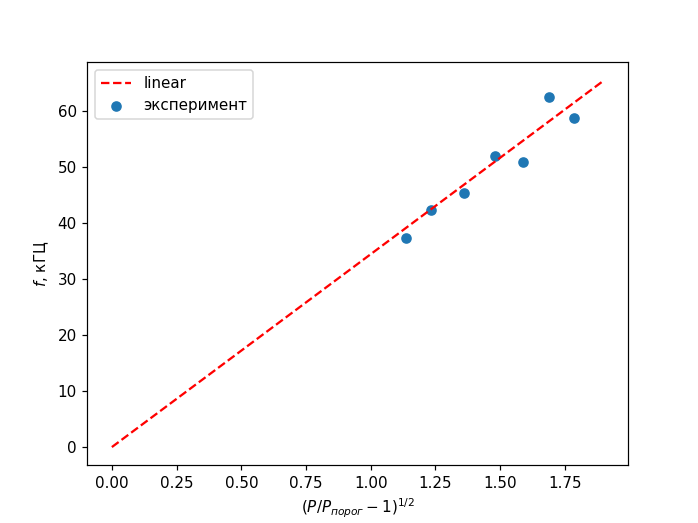

35.898693149583075 -2.709673175493733


In [116]:
%matplotlib notebook
plt.xlabel('($P/P_{порог}-1)^{1/2}$')
plt.ylabel('$f$, кГЦ')

plt.scatter(np.sqrt(delta_P-1), f, label='эксперимент')

k, b = np.polyfit(np.sqrt(delta_P-1), f, 1)
plt.plot([0, 1.9], [0*+b, 1.9*k+b], color = 'r', linestyle='--', label='linear')

plt.legend()

plt.savefig('./pic/x_vs_f', bbox_inches='tight', dpi=150)

print(k, b)

In [117]:
print('tau = ', 1/((k*2*np.pi)**2)/0.278*1000, 'мс')

tau =  0.07070305663269837 мс


0.10605458494904754